In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=8)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 8

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.3

In [2]:
Metadata = pd.read_csv(f'{Project}/Results/Other_papers/Emont_etal.2022.Nature/scRNAseq/scExp_data_slct1.tsv.gz', sep='\t', compression='gzip')
display(Metadata)
display(set(Metadata['cell_type']))

,UMAP_1,UMAP_2,cell_ID,cell_type,Adipoq,Pnpla2,Plin1,Lipe,Pdgfra,Gls,Glul,Glud1,Gpt2
0,-9.542621,-3.414303,Mm_ING_16-1_TCGCACTTCCAAGCTA,Adipocyte,-0.345069,-0.345298,1.881215,1.829081,-0.429339,0.059289,-0.151712,0.496182,0.114842
1,-9.658376,-3.045981,Mm_ING_16-1_CCTATCGTCATTCACT,Adipocyte,1.143173,0.226728,1.966035,2.059887,-0.429339,-0.049854,-0.142373,-0.637899,0.521310
2,-10.773140,-2.729421,Mm_ING_16-1_GCCATTCCATGCACTA,Adipocyte,0.602557,0.262548,1.908669,1.617510,-0.429339,-0.161917,0.427407,0.712103,1.186774
3,-9.749936,-3.078376,Mm_ING_16-1_AAGTTCGCACGGTCTG,Adipocyte,-0.345069,-0.345298,1.916002,1.482896,-0.429339,0.432235,0.187231,1.161094,1.195215
4,-11.210072,-2.699991,Mm_ING_16-1_GACACGCCAACAACAA,Adipocyte,0.615277,0.271656,1.986883,2.057909,-0.429339,-0.153420,0.439005,0.006223,1.204780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190694,4.532373,10.897151,Mm_ING_11-1_GGTGAAGCAATACCCA,ASPC,-0.345069,-0.345298,-0.474507,-0.488457,-0.429339,-0.851582,-0.513940,-0.637899,-0.380007
190695,5.225076,9.215297,Mm_ING_11-1_CCCGAAGAGGTGGCTA,ASPC,-0.345069,-0.345298,-0.474507,-0.488457,-0.429339,-0.851582,-0.513940,3.953592,-0.380007
190696,4.642291,10.113908,Mm_ING_11-1_ACTGATGAGTTCCAGT,ASPC,-0.345069,-0.345298,-0.474507,-0.488457,-0.429339,-0.851582,-0.513940,-0.637899,-0.380007
190697,5.259043,9.444798,Mm_ING_11-1_GATAGAAAGAGTCCGA,ASPC,-0.345069,-0.345298,-0.474507,-0.488457,-0.429339,-0.851582,-0.513940,-0.637899,-0.380007


{'ASPC',
 'Adipocyte',
 'Endothelial',
 'Epithelial',
 'Immune cells',
 'Mesothelial',
 'Smooth muscle'}

In [3]:
Plotdata = Metadata.sample(frac=1).reset_index(drop=True)
Plotdata = Plotdata[ (Plotdata['cell_type']=='Adipocyte') | (Plotdata['cell_type']=='ASPC') ].sort_values('cell_type').reset_index(drop=True)
Plotdata = Plotdata.drop(columns=['UMAP_1','UMAP_2','cell_ID','cell_type']).T

display(Plotdata)

,0,1,2,3,4,5,6,7,8,9,...,88998,88999,89000,89001,89002,89003,89004,89005,89006,89007
Adipoq,-0.345069,-0.345069,-0.345069,-0.345069,-0.345069,-0.345069,-0.345069,-0.345069,-0.345069,-0.345069,...,-0.345069,4.917312,2.404569,0.321744,3.411484,2.825148,-0.345069,-0.345069,2.116405,-0.345069
Pnpla2,-0.345298,-0.345298,-0.345298,-0.345298,-0.345298,-0.345298,-0.345298,-0.345298,-0.345298,-0.345298,...,-0.345298,2.264510,0.775380,0.955312,2.408926,-0.345298,4.499255,1.998549,-0.345298,-0.345298
Plin1,-0.474507,-0.474507,-0.474507,-0.474507,-0.474507,-0.474507,-0.474507,-0.474507,-0.474507,-0.474507,...,2.051454,2.187439,2.190628,0.958741,1.950503,1.921921,1.946166,2.325549,1.830935,1.913691
Lipe,-0.488457,-0.488457,-0.488457,-0.488457,-0.488457,-0.488457,-0.488457,-0.488457,-0.488457,-0.488457,...,1.215787,2.372489,1.667802,1.890198,2.612640,2.973539,2.608058,2.026579,2.313307,-0.488457
Pdgfra,1.673844,1.765059,2.718100,-0.429339,2.220547,1.928459,1.515732,-0.429339,-0.429339,2.483539,...,-0.429339,-0.429339,-0.429339,-0.429339,-0.429339,-0.429339,-0.429339,-0.429339,-0.429339,-0.429339
Gls,0.096088,1.526511,-0.851582,-0.851582,1.565172,1.078151,1.303829,-0.851582,-0.851582,-0.851582,...,0.258196,-0.851582,-0.318258,0.138369,0.014648,-0.851582,-0.851582,-0.851582,0.474434,-0.851582
Glul,-0.513940,-0.513940,-0.513940,-0.513940,-0.513940,-0.513940,-0.513940,-0.513940,-0.513940,-0.513940,...,-0.513940,1.181297,1.016637,2.367505,0.668406,-0.513940,2.632907,-0.513940,1.295983,2.590689
Glud1,0.541998,-0.637899,-0.637899,-0.637899,-0.637899,1.764717,-0.637899,-0.637899,-0.637899,-0.637899,...,-0.637899,-0.637899,-0.637899,0.386184,1.653033,-0.637899,-0.637899,-0.637899,1.674775,-0.637899
Gpt2,-0.380007,-0.380007,-0.380007,-0.380007,-0.380007,-0.380007,-0.380007,-0.380007,-0.380007,-0.380007,...,-0.380007,-0.380007,0.614466,1.153725,1.235225,2.804514,-0.380007,-0.380007,2.092573,5.002529


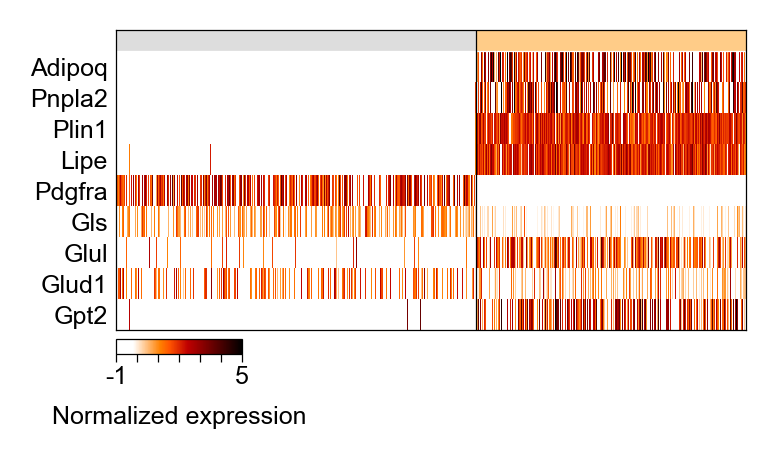

In [25]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [2.1]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

# Heatmap
# cmap1 = mpl.colors.LinearSegmentedColormap.from_list('', ['magenta', 'k', 'yellow'])
# cmap1 = mpl.colors.LinearSegmentedColormap.from_list('', ['#F7F7F7', '#fbe3d4', '#c13639', '#9c1127', '#67001f'])
heat = ax.imshow(Plotdata,
                #  cmap=cmap1, 
                 cmap='gist_heat_r', 
                 vmin=-0.2, vmax=5,
                 interpolation='none', aspect='auto', rasterized=True)

ax.set_title('', fontsize=7)
ax.set_xlabel('', labelpad=0, fontsize=6)
ax.set_ylabel('', labelpad=0, fontsize=6)
ax.set_xticks([])
ax.set_yticks(range(len(Plotdata)))
ax.set_yticklabels(Plotdata.index)
ax.tick_params(length=0, pad=2)

# Cell type band
ax.set_ylim(8.5, -1.2)
ax.axvspan(0, len(Plotdata.columns), facecolor='#FFCC88', alpha=1, zorder=-1)
ax.axvspan(xmin=0, xmax=sum(Metadata['cell_type']=='ASPC'), facecolor='#DDDDDD', alpha=1, zorder=-1)
ax.axhline(-0.5, c='white', lw=0.3)
# ax.axhline(4.5, c='white', lw=0.3)
ax.axvline(sum(Metadata['cell_type']=='ASPC'), c='k', lw=0.3)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['bottom'].set_color('white')
# ax.spines['left'].set_color('white')

cbar_size = [0, -0.08, 0.2, 0.05]
cbar = plt.colorbar(heat, cax = fig.add_axes(cbar_size), orientation='horizontal')
cbar.ax.set_xlabel('Normalized expression', fontsize=6)
cbar.set_ticks([-1,0,1,2,3,4,5])
cbar.set_ticklabels(['-1','','','','','','5'])
cbar.ax.tick_params(width=0.3, length=2, pad=1)


plt.savefig('Emont_scHeatmap.pdf', bbox_inches='tight')
plt.show()    